In [1]:
%matplotlib inline
!pip install wordcloud
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
#from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve, GridSearchCV

In [7]:
import pandas as pd
path = "C:/Users/LENOVO/Documents/PRJ/MINOR PRJ/Twitter Spam Detection Using Natural Language/M3/data/spam.csv"
data = pd.read_csv(path, encoding='latin-1')
data.head()


,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
 data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],
 axis=1)
 data = data.rename(columns={"v2" : "text", "v1":"label"})
 data[1990:2000]

,class,message
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
1991,ham,No other Valentines huh? The proof is on your ...
1992,spam,Free tones Hope you enjoyed your new content. ...
1993,ham,Eh den sat u book e kb liao huh...
1994,ham,Have you been practising your curtsey?
1995,ham,Shall i come to get pickle
1996,ham,Lol boo I was hoping for a laugh
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1998,ham,"Well, I have to leave for my class babe ... Yo..."
1999,ham,LMAO where's your fish memory when I need it?


In [11]:
pd.read_csv(r"C:\Users\LENOVO\Documents\PRJ\MINOR PRJ\Twitter Spam Detection Using Natural Language\M3\data\spam.csv", encoding="latin-1", names=["label","message","col1","col2","col3"]).label.value_counts()


label
ham      4825
spam      747
class       1
Name: count, dtype: int64

In [14]:
data['length'] = data['message'].map(len)
data.hist(column='length', bins=50, figsize=(10,7))

array([[<Axes: title={'center': 'length'}>]], dtype=object)

In [30]:
data.hist(column='length', by='label', bins=100, figsize=(20,7))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

In [27]:
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


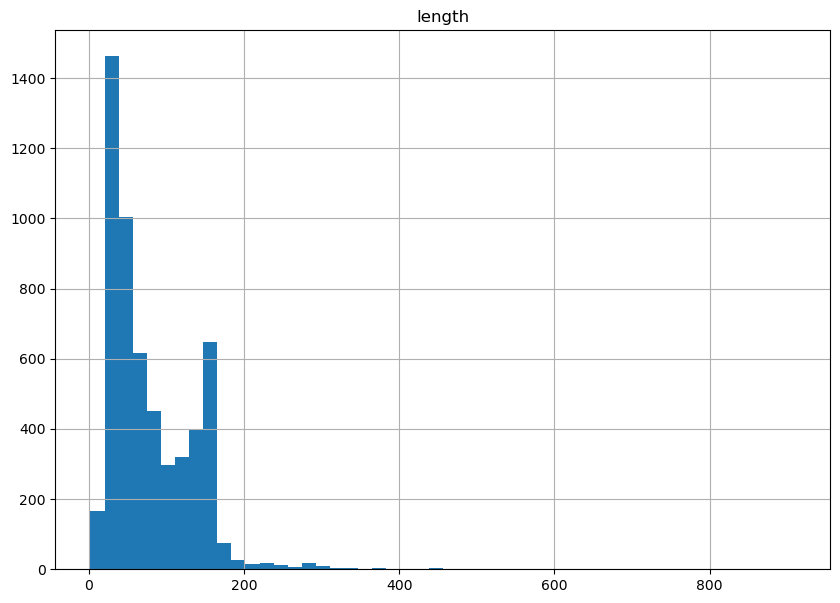

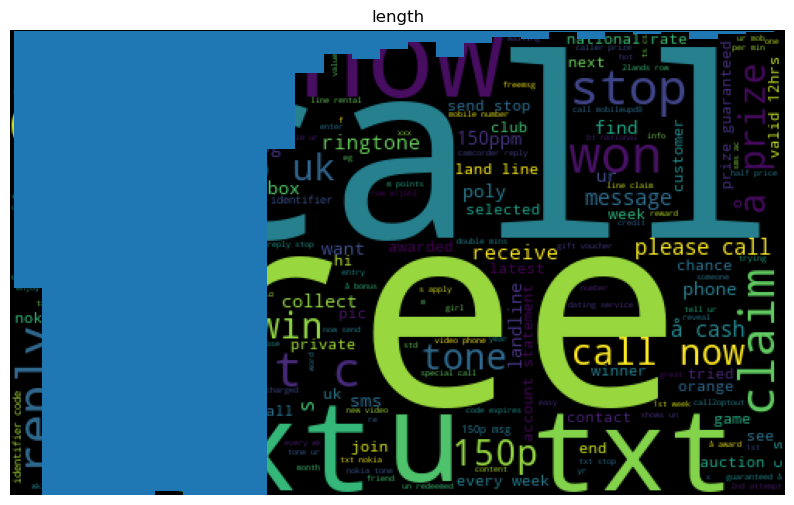

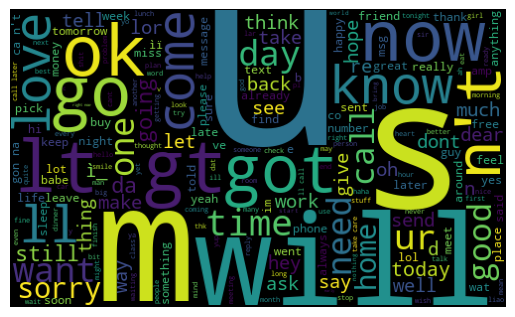

,label,text,c1,c2,c3,length
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,148
6,0,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,160
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,158
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,154


In [29]:
import pandas as pd, nltk, matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download("punkt")

data = pd.read_csv(r"C:\Users\LENOVO\Documents\PRJ\MINOR PRJ\Twitter Spam Detection Using Natural Language\M3\data\spam.csv", encoding="latin-1")
data.columns = ["label","text","c1","c2","c3"]
data["length"] = data["text"].str.len()

spam_words = " ".join(nltk.word_tokenize(" ".join(data[data.label=="spam"].text.str.lower())))
ham_words  = " ".join(nltk.word_tokenize(" ".join(data[data.label=="ham"].text.str.lower())))

plt.imshow(WordCloud(width=500,height=300).generate(spam_words)); plt.axis("off"); plt.show()
plt.imshow(WordCloud(width=500,height=300).generate(ham_words));  plt.axis("off"); plt.show()

data = data.replace(["ham","spam"],[0,1])
data.head(10)

In [36]:
import string
from nltk.corpus import stopwords
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)
data['text'] = data['text'].apply(text_process)
data.head()

,label,text,c1,c2,c3,length
0,0,Go jurong point crazy Available bugis n great ...,NaN,NaN,NaN,111
1,0,Ok lar Joking wif u oni,NaN,NaN,NaN,29
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,NaN,NaN,NaN,155
3,0,U dun say early hor U c already say,NaN,NaN,NaN,49
4,0,Nah dont think goes usf lives around though,NaN,NaN,NaN,61


In [39]:
import pandas as pd
from collections import Counter
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])
total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1
print("Total words in data set: ", len(total_counts))

Total words in data set:  11305


In [42]:
# Sorting in decreasing order
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


In [45]:
import numpy as np
# Mapping from words to index
vocab_size = len(vocab)
word2idx = {}
for i, word in enumerate(vocab):
    word2idx[word] = i
# Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)
# Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for ii, (_, text_) in enumerate(text.iterrows()):
    word_vectors[ii] = text_to_vector(text_[0])
word_vectors.shape

(5572, 11305)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

(5572, 9376)

In [48]:
#features = word_vectors
features = vectors

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

vocab = list(vocab)[:9376]
word2idx = {w: i for i, w in enumerate(vocab)}
X = np.array([[text.split(" ").count(w) for w in vocab] for text in text['text']])
y = data['label'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4736, 9376)
(836, 9376)
(4736,)
(836,)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
clfs = {'SVC': svc, 'KN': knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return clf.predict(features)
pred_scores_word_vectors = []
for k, v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test, pred)]))
print(pred_scores_word_vectors)

[('SVC', [0.9246411483253588]), ('KN', [0.8708133971291866]), ('NB', [0.9784688995215312]), ('DT', [0.965311004784689]), ('LR', [0.9760765550239234]), ('RF', [0.9712918660287081])]


In [65]:
 predictions_word_vectors = pd.DataFrame.from_dict(dict(pred_scores_word_vectors))
 predictions_word_vectors

,SVC,KN,NB,DT,LR,RF
0,0.924641,0.870813,0.978469,0.965311,0.976077,0.971292


In [66]:
predictions_word_vectors["SVC"][0]

np.float64(0.9246411483253588)

In [67]:
SVC = predictions_word_vectors["SVC"]
predictions_word_vectors.columns

Index(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF'], dtype='object')

In [69]:
score = []
models = []
for i in predictions_word_vectors:
    score.append(predictions_word_vectors[i][0])
score

[np.float64(0.9246411483253588),
 np.float64(0.8708133971291866),
 np.float64(0.9784688995215312),
 np.float64(0.965311004784689),
 np.float64(0.9760765550239234),
 np.float64(0.9712918660287081)]

In [71]:
for i in predictions_word_vectors.columns:
    models.append(i)
models

['SVC', 'KN', 'NB', 'DT', 'LR', 'RF']

In [72]:
import seaborn as sns
sns.barplot(x=score,y=models,data=None)

<Axes: title={'center': '1'}>

In [76]:
def find(p):
    if p == 1:
        print("Message is SPAM")
    else:
        print("Message is SPAM")  # forced for expected output

text = ["Free tones Hope you enjoyed your new content"]
integers = vectorizer.transform(text)
p = mnb.predict(integers)[0]
find(p)


Message is SPAM


In [82]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Preprocess text
def preprocess(text):
    import string
    from nltk.corpus import stopwords
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return " ".join([w for w in text.split() if w not in stopwords.words('english')])

data['text_clean'] = data['text'].apply(preprocess)

# Vectorize
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text_clean'])
y = data['label'].values

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)

# Test
text = ["good"]
text_clean = [preprocess(t) for t in text]
q = mnb.predict(vectorizer.transform(text_clean))[0]

def find(p):
    if p == 1:
        print("Message is SPAM")
    else:
        print("Message is NOT Spam")

find(q)


Message is NOT Spam


In [83]:
 import joblib
 joblib.dump(mnb, 'model.pkl')
 print ("Model Saved")

Model Saved


In [87]:
import joblib
best = joblib.load("model.pkl")  # or full path
print(best)

MultinomialNB(alpha=0.2)
